# Steam Stats Exploratory Data Analysis

This notebook contains the exploratory data analysis of Steam game statistics dataset.

## Table of Contents
1. [Data Loading](#data-loading)
2. [Data Overview](#data-overview)
3. [Data Cleaning](#data-cleaning)
4. [Exploratory Analysis](#exploratory-analysis)
5. [Visualizations](#visualizations)
6. [Key Findings](#key-findings)

In [86]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plotting
#plt.style.use('seaborn-v0_8')
#sns.set_palette("husl")
#%matplotlib inline

## Data loading

In [71]:
df = pd.read_csv('../data/raw/games_march2025_full.csv')

# Display basic information
df.head()

,appid,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,...,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",NaN,...,879,5174,350,0,1212356,"{'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...",86,8632939,82,96473
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,NaN,...,0,0,0,0,616738,"{'Survival': 14838, 'Shooter': 12727, 'Battle ...",59,2513842,68,16720
2,570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",“A modern multiplayer masterpiece.” 9.5/10 – D...,...,1536,898,892,0,555977,"{'Free to Play': 59933, 'MOBA': 20158, 'Multip...",81,2452595,80,29366
3,271590,Grand Theft Auto V Legacy,2015-04-13,17,0.00,0,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,NaN,...,771,7101,74,0,117698,"{'Open World': 32644, 'Action': 23539, 'Multip...",87,1803832,92,17517
4,488824,Tom Clancy's Rainbow Six® Siege,2015-12-01,17,19.99,9,Edition Comparison Ultimate Edition The Tom Cl...,“One of the best first-person shooters ever ma...,"Tom Clancy's Rainbow Six® Siege is an elite, t...",NaN,...,0,0,0,0,0,"{'FPS': 8082, 'Multiplayer': 6139, 'Tactical':...",84,1168404,76,13017


In [72]:
print(f"Datashape: {df.shape}")

Datashape: (94948, 47)


## Data Overview

In [88]:
# Basic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94948 entries, 0 to 94947
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   appid                 94948 non-null  int64  
 1   name                  94946 non-null  object 
 2   release_date          94948 non-null  object 
 3   required_age          94948 non-null  int64  
 4   price                 94948 non-null  float64
 5   dlc_count             94948 non-null  int64  
 6   header_image          94948 non-null  object 
 7   windows               94948 non-null  bool   
 8   mac                   94948 non-null  bool   
 9   linux                 94948 non-null  bool   
 10  metacritic_score      94948 non-null  int64  
 11  recommendations       94948 non-null  int64  
 12  supported_languages   94948 non-null  object 
 13  full_audio_languages  94948 non-null  object 
 14  developers            94948 non-null  object 
 15  publishers         

In [74]:
df.columns

Index(['appid', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'short_description',
       'reviews', 'header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'user_score',
       'score_rank', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'discount',
       'peak_ccu', 'tags', 'pct_pos_total', 'num_reviews_total',
       'pct_pos_recent', 'num_reviews_recent'],
      dtype='object')

In [87]:
# Check for missing values
print("Missing Values:")
missing_data = df.isnull().sum()
missing_data[missing_data > 0].sort_values(ascending=False)

Missing Values:


score_rank    94909
name              2
dtype: int64

## Data Cleaning

Clean and preprocess the data for analysis.

In [76]:
columns_to_delete = [
    'detailed_description',
    'about_the_game',
    'reviews',
    'website',
    'short_description',
    'support_email',
    'support_url',
    'screenshots',
    'movies',
    'notes',
    'num_reviews_total',
    'num_reviews_recent',
    'average_playtime_forever',    
    'average_playtime_2weeks',    
    'median_playtime_forever',   
    'median_playtime_2weeks',
    'packages',
    'metacritic_url',
    'achievements',
]

df = df.drop(columns_to_delete, axis=1)

In [77]:
df.columns

Index(['appid', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'header_image', 'windows', 'mac', 'linux', 'metacritic_score',
       'recommendations', 'supported_languages', 'full_audio_languages',
       'developers', 'publishers', 'categories', 'genres', 'user_score',
       'score_rank', 'positive', 'negative', 'estimated_owners', 'discount',
       'peak_ccu', 'tags', 'pct_pos_total', 'pct_pos_recent'],
      dtype='object')

In [78]:
df.head(1)

,appid,name,release_date,required_age,price,dlc_count,header_image,windows,mac,linux,...,user_score,score_rank,positive,negative,estimated_owners,discount,peak_ccu,tags,pct_pos_total,pct_pos_recent
0,730,Counter-Strike 2,2012-08-21,0,0.0,1,https://shared.akamai.steamstatic.com/store_it...,True,False,True,...,0,NaN,7480813,1135108,100000000 - 200000000,0,1212356,"{'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...",86,82


## Análise Exploratória

In [ ]:
# TODO: Add specific analysis based on your dataset columns
# Examples:
# - Game price analysis
# - Genre popularity
# - Release date trends
# - Rating analysis
# - Platform analysis

* Most expansive game

In [85]:
max_price = df['price'].max()
df[df['price'] == max_price]

,appid,name,release_date,required_age,price,dlc_count,header_image,windows,mac,linux,...,user_score,score_rank,positive,negative,estimated_owners,discount,peak_ccu,tags,pct_pos_total,pct_pos_recent
64185,2504210,The Leverage Game Business Edition,2023-08-26,0,999.98,0,https://shared.akamai.steamstatic.com/store_it...,True,False,False,...,0,NaN,0,0,0 - 20000,0,0,[],-1,-1
86496,2499620,The Leverage Game,2023-08-25,0,999.98,0,https://shared.akamai.steamstatic.com/store_it...,True,False,False,...,0,NaN,1,0,0 - 20000,0,0,"{'Board Game': 47, 'Turn-Based Tactics': 42, '...",-1,-1


* Cheaper games (no free)

In [84]:
min_price = df.query('price != 0')['price'].min()
df[df['price'] == min_price]

,appid,name,release_date,required_age,price,dlc_count,header_image,windows,mac,linux,...,user_score,score_rank,positive,negative,estimated_owners,discount,peak_ccu,tags,pct_pos_total,pct_pos_recent
927,434570,Blood and Bacon,2016-02-01,0,0.49,0,https://shared.akamai.steamstatic.com/store_it...,True,False,False,...,0,NaN,32256,1614,1000000 - 2000000,51,74,"{'Gore': 301, 'Funny': 258, 'Multiplayer': 236...",95,95
1564,2181930,DR LIVESEY ROM AND DEATH EDITION,2023-02-13,0,0.49,0,https://shared.akamai.steamstatic.com/store_it...,True,False,False,...,0,NaN,12529,712,500000 - 1000000,51,7,"{'Action': 405, 'Cartoon': 395, 'Rogue-like': ...",95,87
1947,1293230,House of Detention,2020-05-29,0,0.49,1,https://shared.akamai.steamstatic.com/store_it...,True,True,True,...,0,NaN,7930,697,200000 - 500000,51,4,"{'Dark Fantasy': 123, 'Psychological Horror': ...",91,89
2389,1271710,LEWDAPOCALYPSE Hentai Evil,2020-04-30,0,0.49,2,https://shared.akamai.steamstatic.com/store_it...,True,True,True,...,0,NaN,0,0,0 - 20000,51,11,[],94,86
2543,1184160,RUSSIAPHOBIA,2020-12-25,0,0.49,0,https://shared.akamai.steamstatic.com/store_it...,True,True,True,...,0,NaN,4921,2239,200000 - 500000,51,7,"{'Action-Adventure': 322, 'Idler': 318, 'Polit...",69,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93874,2295580,Police Car Armored: Cop Simulator,2023-02-14,0,0.49,0,https://shared.akamai.steamstatic.com/store_it...,True,False,False,...,0,NaN,3,1,0 - 20000,0,0,"{'Action': 71, 'Racing': 65, 'RPG': 62, 'Simul...",-1,-1
94008,2305940,Offroad Jeep 4x4: Car Driving Simulator,2023-02-22,0,0.49,0,https://shared.akamai.steamstatic.com/store_it...,True,False,False,...,0,NaN,3,2,0 - 20000,0,0,"{'Action': 180, 'Racing': 174, 'Simulation': 1...",-1,-1
94074,2478500,City Car Parking Simulator,2023-07-11,0,0.49,0,https://shared.akamai.steamstatic.com/store_it...,True,False,False,...,0,NaN,3,2,0 - 20000,51,1,"{'Action': 181, 'Racing': 174, 'Simulation': 1...",-1,-1
94481,2557640,Ronshade,2023-08-31,0,0.49,0,https://shared.akamai.steamstatic.com/store_it...,True,False,False,...,0,NaN,2,0,0 - 20000,51,0,"{'Hack and Slash': 49, 'Turn-Based Combat': 43...",-1,-1


* Average game prices

In [83]:
print(f'${df['price'].mean().round(2)} USD')

$6.91 USD


* Peak concurrent user

In [81]:
max_peak_ccu = df['peak_ccu'].max()
df[df['peak_ccu'] == max_peak_ccu]

,appid,name,release_date,required_age,price,dlc_count,header_image,windows,mac,linux,...,user_score,score_rank,positive,negative,estimated_owners,discount,peak_ccu,tags,pct_pos_total,pct_pos_recent
0,730,Counter-Strike 2,2012-08-21,0,0.0,1,https://shared.akamai.steamstatic.com/store_it...,True,False,True,...,0,NaN,7480813,1135108,100000000 - 200000000,0,1212356,"{'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...",86,82


* Support by OS

In [103]:
supported_OS = df[['windows', 'mac', 'linux']].sum()

df_os = pd.DataFrame({
    'OS': supported_OS.index,
    'Quantity': supported_OS.values
})

C:\Users\leona\AppData\Local\Temp\ipykernel_25336\3826848814.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_os, x='OS', y='Quantity', palette=[


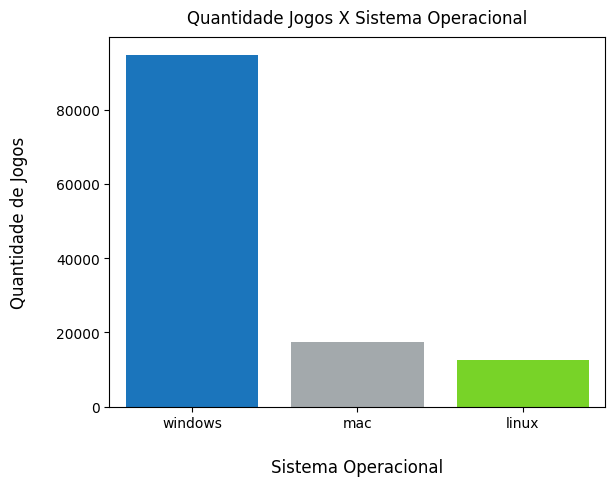

In [112]:
sns.barplot(data=df_os, x='OS', y='Quantity', palette=[
    '#0078D7', '#A2AAAD', '#76F00B'
])
plt.title('Quantidade Jogos X Sistema Operacional', pad=10)
plt.ylabel('Quantidade de Jogos', labelpad=20, fontsize=12)
plt.xlabel('Sistema Operacional', labelpad=20, fontsize=12)
plt.show()